In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import sklearn as sk
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz

import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn import metrics

#import time
import timeit

from sklearn.svm import SVR

import random

from subprocess import call

import seaborn as sns

In [5]:
file_name="CompareData\TrainingSet.pkl"
raw_data = pd.read_pickle(file_name)
#print(raw_data)= https://doi-org.ezproxy.library.qmul.ac.uk/10.1103/PhysRevLett.117.135502

data = raw_data
print("In this dataset we have columns of:")
print('Co = Coordinates array 10x3')
print('Ce = Cell paramaters array 3x3')
print('X = Representation array 4x2 (number in periodic table in format down,along from 1 without transition Metals)')
print('Z = Atoms int')
print('T = Total Formation Energy int')
print('N = Number of Atoms int')

#print(dataset['Z'])
#print((pd.Series(data['Ce'][:,0, 2])))
#data['Co'][0]
data['X'][2], data['Z'][0]
co_index = pd.MultiIndex.from_product(
    (("X1", "X2", "X3", "X4", "X5", "X6", "A1", "A2", "B1", "B2"), ("x", "y", "z")))
#co_index

dataframe = pd.DataFrame([np.ravel(d) for d in data['Co']], columns=co_index)
dataframe['Cell Parameter'] = pd.Series([d[0][1] for d in data['Ce']], name="cell_parameter")


rep_index = pd.MultiIndex.from_product((('Atom 1', 'Atom 2', 'Atom 3', 'Atom 4'), ('XPT', 'YPT')))
X_frame = pd.DataFrame([np.ravel(d) for d in data['X']], columns=rep_index)
dataframe = pd.concat([dataframe, X_frame], axis=1)

dataframe['Formation Energy'] = data['T']

In this dataset we have columns of:
Co = Coordinates array 10x3
Ce = Cell paramaters array 3x3
X = Representation array 4x2 (number in periodic table in format down,along from 1 without transition Metals)
Z = Atoms int
T = Total Formation Energy int
N = Number of Atoms int


In [3]:
print(len(dataframe.columns))
print(dataframe.columns)
print(len(raw_data))
print(data['Z'])
pd.set_option('display.max_columns', len(dataframe.columns))
#print(dataframe.head(1))

40
MultiIndex([(              'X1',   'x'),
            (              'X1',   'y'),
            (              'X1',   'z'),
            (              'X2',   'x'),
            (              'X2',   'y'),
            (              'X2',   'z'),
            (              'X3',   'x'),
            (              'X3',   'y'),
            (              'X3',   'z'),
            (              'X4',   'x'),
            (              'X4',   'y'),
            (              'X4',   'z'),
            (              'X5',   'x'),
            (              'X5',   'y'),
            (              'X5',   'z'),
            (              'X6',   'x'),
            (              'X6',   'y'),
            (              'X6',   'z'),
            (              'A1',   'x'),
            (              'A1',   'y'),
            (              'A1',   'z'),
            (              'A2',   'x'),
            (              'A2',   'y'),
            (              'A2',   'z'),
            (

In [4]:
def multi_lin_reg(data, test_size, random_state= 0):
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    return(round(np.sqrt(sk.metrics.mean_squared_error(y_test, y_pred, squared=False)), 3)) #rms error

def poly_reg(data, test_size, poly_degree, random_state= 0):
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
    poly_reg = PolynomialFeatures(degree = poly_degree)
    X_poly = poly_reg.fit_transform(X_train)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y_train)
    y_pred = lin_reg.predict(poly_reg.fit_transform(X_test))
    return(round(np.sqrt(sk.metrics.mean_squared_error(y_test, y_pred, squared=False)), 3))

def random_forest_reg(data, test_size, num_estimators, random_state= 0):
    X = dataframe.iloc[:, 1:-1].values
    y = dataframe.iloc[:, -1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
    regressor = RandomForestRegressor(n_estimators = num_estimators, random_state = 0)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict((X_test))
    return(round(np.sqrt(sk.metrics.mean_squared_error(y_test, y_pred, squared=False)), 3))

def SVR_analyse(data, test_size, kernel, random_state= 0):
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    regressor = SVR(kernel=kernel)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    return(round(np.sqrt(sk.metrics.mean_squared_error(y_test, y_pred, squared=False)), 3))

def ann_reg(data, train_split, units_1, units_2, batch_size, epochs, random_state= 0):
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = train_split, random_state = random_state)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # https://stackoverflow.com/questions/49008074/how-to-create-a-neural-network-for-regression - was useful here
    ann = tf.keras.models.Sequential()
    
    ann.add(tf.keras.layers.Dense(units=units_1, activation='relu'))
    
    ann.add(tf.keras.layers.Dense(units=units_2, activation='sigmoid'))
    
    ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
    
    ann.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 0)
    
    y_pred = ann.predict(X_test)
    
    return(round(np.sqrt(sk.metrics.mean_squared_error(y_test, y_pred, squared=False)), 3))

Text(0, 0.5, 'Error (RMS eV/atom)')

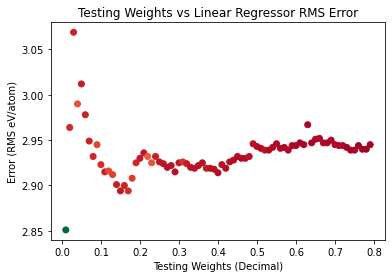

In [5]:
weights = np.arange(0.01, 0.8, .01) 
acc_list = []                              #Accuracy List
calc_time = []                             #Time of running algorithm
for i in range(0, len(weights)):
    time1 = timeit.default_timer()
    acc_list.append(multi_lin_reg(dataframe, weights[i]))
    time2 = timeit.default_timer()
    calc_time.append(time2 - time1)
plt.scatter(weights, acc_list, c= calc_time,cmap='RdYlGn')
plt.title("Testing Weights vs Linear Regressor RMS Error")
plt.xlabel("Testing Weights (Decimal)")
plt.ylabel("Error (RMS eV/atom)")

Text(0, 0.5, 'Error (RMS eV/atom)')

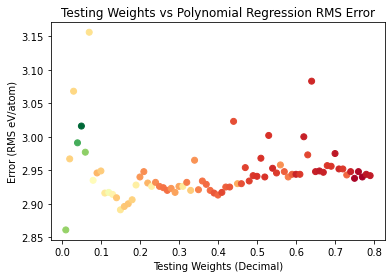

In [6]:
#print(poly_reg(dataframe, 0.2, 2))
weights = np.arange(0.01, 0.8, .01) 
acc_list = []
calc_time = []
for i in range(0, len(weights)):
    time1 = timeit.default_timer()
    acc_list.append(poly_reg(dataframe, weights[i], 1))
    time2 = timeit.default_timer()
    calc_time.append(time2 - time1)
plt.scatter(weights, acc_list, c= calc_time,cmap='RdYlGn')
plt.title("Testing Weights vs Polynomial Regression RMS Error")
plt.xlabel("Testing Weights (Decimal)")
plt.ylabel("Error (RMS eV/atom)")

In [7]:
weights_wide = np.arange(0.01, 0.8, 0.05)
weights_thin = np.arange(0.01, 0.2, 0.01)
estim_range = np.arange(1, 20, 1)
thin_estim_range = np.arange(15, 25, 1)
acc_list_wide, acc_list_thin = [], []
calc_time_wide, calc_time_thin = [], []
acc_list, acc_thin_estim_list = [], []
calc_time, thin_estim_calc_time = [], []


print("This Takes a while with 10 Estimators")

for i in range(0, len(weights_wide)):
    time1 = timeit.default_timer()
    acc_list_wide.append(random_forest_reg(dataframe, weights_wide[i], 10))
    time2 = timeit.default_timer()
    calc_time_wide.append(time2 - time1)
for i in range(0, len(weights_thin)):
    time1 = timeit.default_timer()
    acc_list_thin.append(random_forest_reg(dataframe, weights_thin[i], 10))
    time2 = timeit.default_timer()
    calc_time_thin.append(time2 - time1)  
for i in range(0, len(estim_range)):
    time1 = timeit.default_timer()
    acc_list.append(random_forest_reg(dataframe, 0.05, estim_range[i]))
    time2 = timeit.default_timer()
    calc_time.append(time2 - time1)
    
for i in range(0, len(thin_estim_range)):
    time1 = timeit.default_timer()
    acc_thin_estim_list.append(random_forest_reg(dataframe, 0.05, thin_estim_range[i]))
    time2 = timeit.default_timer()
    thin_estim_calc_time.append(time2 - time1)
#ax_4 = fig.add_subplot(2, 2, 4)
#ax_4.scatter(estim_range, [i / j for i,j in zip(acc_list, calc_time)], c= calc_time,cmap='RdYlGn')
#ax_4.axhline(y = 1)
#ax_4.set_title("Estimators vs Accuracy per time working for Rand Forest")
#ax_4.set_xlabel("Estimators")
#ax_4.set_ylabel("Accuracy per time working (RMS/Time)")

This Takes a while with 10 Estimators


Text(0, 0.5, 'Error (RMS eV/atom)')

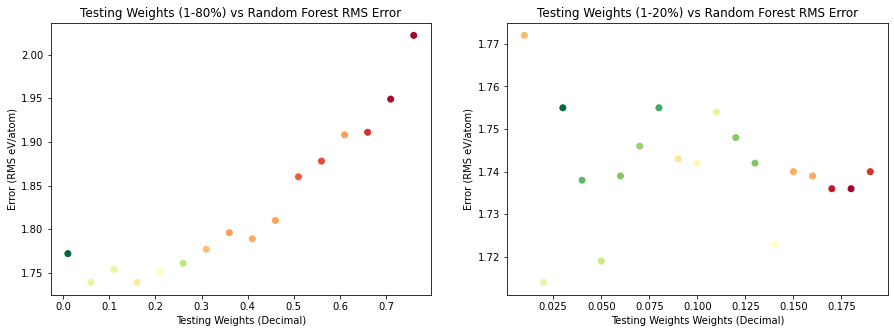

In [8]:
fig = plt.figure(figsize =(15,5))

ax_1 = fig.add_subplot(1, 2, 1)
ax_1.scatter(weights_wide, acc_list_wide, c= calc_time_wide,cmap='RdYlGn')
ax_1.set_title("Testing Weights (1-80%) vs Random Forest RMS Error")
ax_1.set_xlabel("Testing Weights (Decimal)")
ax_1.set_ylabel("Error (RMS eV/atom)")
ax_2 = fig.add_subplot(1, 2, 2)
ax_2.scatter(weights_thin, acc_list_thin, c= calc_time_thin,cmap='RdYlGn')
ax_2.set_title("Testing Weights (1-20%) vs Random Forest RMS Error")
ax_2.set_xlabel("Testing Weights Weights (Decimal)")
ax_2.set_ylabel("Error (RMS eV/atom)")

Text(0, 0.5, 'Error (RMS eV/atom)')

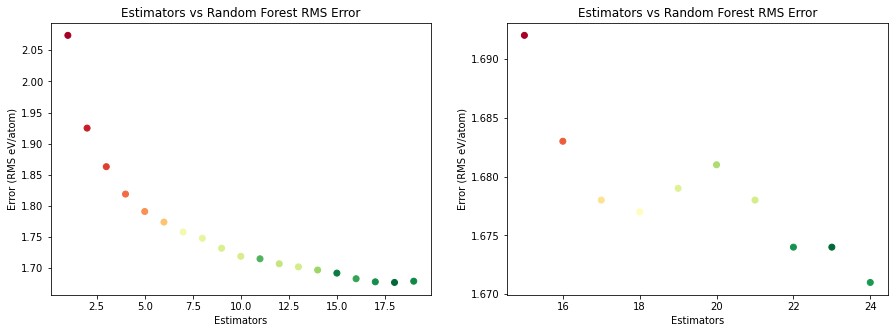

In [9]:
fig = plt.figure(figsize =(15,5))
ax_1 = fig.add_subplot(1, 2, 1)
ax_1.scatter(estim_range, acc_list, c= calc_time,cmap='RdYlGn')
ax_1.set_title("Estimators vs Random Forest RMS Error")
ax_1.set_xlabel("Estimators")
ax_1.set_ylabel("Error (RMS eV/atom)")

ax_2 = fig.add_subplot(1, 2, 2)
ax_2.scatter(thin_estim_range, acc_thin_estim_list, c= thin_estim_calc_time,cmap='RdYlGn')
ax_2.set_title("Estimators vs Random Forest RMS Error")
ax_2.set_xlabel("Estimators")
ax_2.set_ylabel("Error (RMS eV/atom)")

Text(0, 0.5, 'Error (RMS eV/atom)')

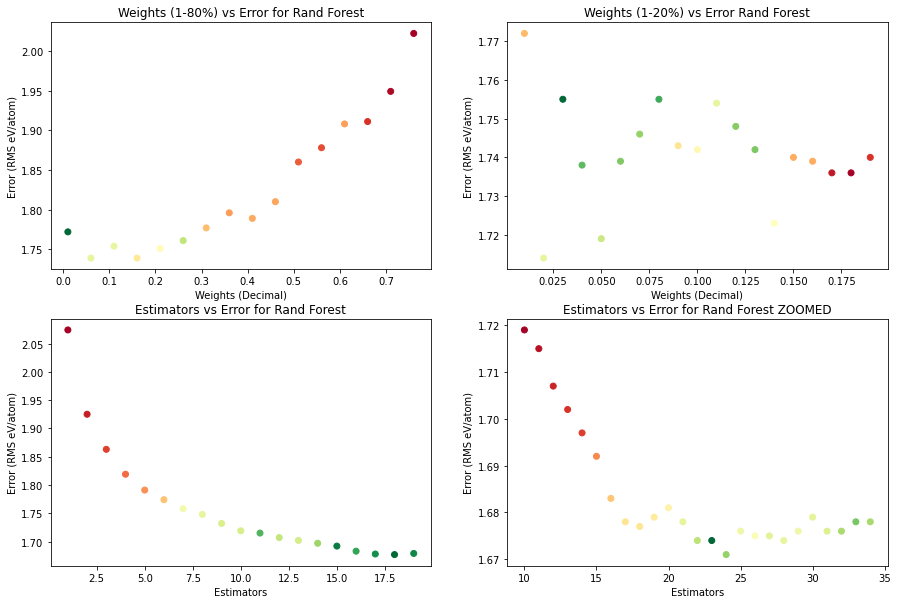

In [10]:
thin_estim_range = np.arange(10, 35, 1)
thin_estim_calc_time = []
acc_thin_estim_list = []

for i in range(0, len(thin_estim_range)):
    time1 = timeit.default_timer()
    acc_thin_estim_list.append(random_forest_reg(dataframe, 0.05, thin_estim_range[i]))
    time2 = timeit.default_timer()
    thin_estim_calc_time.append(time2 - time1)

fig = plt.figure(figsize =(15,10))

ax_1 = fig.add_subplot(2, 2, 1)
ax_1.scatter(weights_wide, acc_list_wide, c= calc_time_wide,cmap='RdYlGn')
ax_1.set_title("Weights (1-80%) vs Error for Rand Forest")
ax_1.set_xlabel("Weights (Decimal)")
ax_1.set_ylabel("Error (RMS eV/atom)")

ax_2 = fig.add_subplot(2, 2, 2)
ax_2.scatter(weights_thin, acc_list_thin, c= calc_time_thin,cmap='RdYlGn')
ax_2.set_title("Weights (1-20%) vs Error Rand Forest")
ax_2.set_xlabel("Weights (Decimal)")
ax_2.set_ylabel("Error (RMS eV/atom)")

ax_3 = fig.add_subplot(2, 2, 3)
ax_3.scatter(estim_range, acc_list, c= calc_time,cmap='RdYlGn')
ax_3.set_title("Estimators vs Error for Rand Forest")
ax_3.set_xlabel("Estimators")
ax_3.set_ylabel("Error (RMS eV/atom)")

ax_4 = fig.add_subplot(2, 2, 4)
ax_4.scatter(thin_estim_range, acc_thin_estim_list, c= thin_estim_calc_time,cmap='RdYlGn')
ax_4.set_title("Estimators vs Error for Rand Forest ZOOMED")
ax_4.set_xlabel("Estimators")
ax_4.set_ylabel("Error (RMS eV/atom)")

In [11]:
units_list = np.arange(1, 20, 1)
batch_list = np.arange(1, 60, 1)
epoch_list = np.arange(2, 40, 1)
acc_list_u1, acc_list_b, acc_list_e = [],[],[]
calc_time_u1, calc_time_u2, calc_time_b, calc_time_e = [],[],[],[]

for i in range(0, len(units_list)):
    time1 = timeit.default_timer()
    acc_list_u1.append(ann_reg(dataframe, 0.2, units_list[i], 1, 32, 20))
    time2 = timeit.default_timer()
    calc_time_u1.append(time2 - time1)
for i in range(0, len(batch_list)):
    time1 = timeit.default_timer()
    acc_list_b.append(ann_reg(dataframe, 0.2, 6, 1, batch_list[i], 20))
    time2 = timeit.default_timer()
    calc_time_b.append(time2 - time1)
for i in range(0, len(epoch_list)):
    time1 = timeit.default_timer()
    acc_list_e.append(ann_reg(dataframe, 0.2, 6, 1, 32, epoch_list[i]))
    time2 = timeit.default_timer()
    calc_time_e.append(time2 - time1)

KeyboardInterrupt: 

In [ ]:
plt.scatter(units_list, acc_list_u1, c= calc_time_u1,cmap='RdYlGn')
plt.title("Units (nodes) in 1st Layer vs Artificial Neural Network RMS Error")
plt.xlabel("Unit Number")
plt.ylabel("Error (RMS eV/atom)")
plt.show()

plt.scatter(batch_list, acc_list_b, c= calc_time_b,cmap='RdYlGn')
plt.title("Batch Size vs Artificial Neural Network RMS Error")
plt.xlabel("Batch Number")
plt.ylabel("Error (RMS eV/atom)")
plt.show()

plt.scatter(epoch_list, acc_list_e, c= calc_time_e,cmap='RdYlGn')
plt.title("Epoch Number vs Artificial Neural Network RMS Error")
plt.xlabel("Epoch Numbers")
plt.ylabel("Error (RMS eV/atom)")
plt.show()

In [ ]:
kernel_list = ["linear", "poly", "rbf", "sigmoid"] #Could not use precomputed kernel becasue of square features.
weight_list = np.arange(0.01, 0.4, 0.05) 
weight_list_thin = np.arange(0.01, 0.2, 0.01) 
acc_kernel_list, acc_weight_list, acc_weight_list_thin = [], [], []
calc_time_kernel, calc_time_weight, calc_time_weight_thin = [], [], []

In [ ]:
for i in range(0, len(weight_list)):
    time1 = timeit.default_timer()
    acc_weight_list.append(SVR_analyse(dataframe, weight_list[i], 'rbf'))
    time2 = timeit.default_timer()
    calc_time_weight.append(time2 - time1)
print('weights')

In [ ]:
for i in range(0, len(weight_list_thin)):
    time1 = timeit.default_timer()
    acc_weight_list_thin.append(SVR_analyse(dataframe, weight_list_thin[i], 'rbf'))
    time2 = timeit.default_timer()
    calc_time_weight_thin.append(time2 - time1)
print('Weights Thin')

In [ ]:
for i in range(0, len(kernel_list)):
    time1 = timeit.default_timer()
    acc_kernel_list.append(SVR_analyse(dataframe, 0.2, kernel_list[i]))
    time2 = timeit.default_timer()
    calc_time_kernel.append(time2 - time1)

In [ ]:
fig = plt.figure(figsize =(15,5))

print(len(weight_list_thin), len(acc_weight_list_thin)) 
print(len(weight_list), len(acc_weight_list)) 

ax_1 = fig.add_subplot(1, 2, 1)
ax_1.scatter(weight_list, acc_weight_list, c= calc_time_weight,cmap='RdYlGn')
ax_1.set_title("Testing Weights vs Support Vector Regression RMS Error")
ax_1.set_xlabel("Testing Weights (Decimal)")
ax_1.set_ylabel("Error (RMS eV/atom)")

ax_2 = fig.add_subplot(1, 2, 2)
ax_2.scatter(weight_list_thin, acc_weight_list_thin, c= calc_time_weight_thin,cmap='RdYlGn')
ax_2.set_title("Testing Weights (Minimum) vs Support Vector Regression RMS Error")
ax_2.set_xlabel("Testing Weights (Decimal)")
ax_2.set_ylabel("Error (RMS eV/atom)")

In [ ]:
plt.scatter(kernel_list, acc_kernel_list, c= calc_time_kernel,cmap='RdYlGn')
plt.title("Kernel Dependant SVR RMS Error")
plt.xlabel("Kernel")
plt.ylabel("Error (RMS eV/atom)")
plt.show()

In [ ]:
weight_list_A = np.arange(0.1, 0.2, 0.01) 
calc_time_A, acc_list_A = [], []

for i in range(0, len(weight_list_A)):
    time1 = timeit.default_timer()
    acc_list_A.append(ann_reg(dataframe, weight_list_A[i], units_1=14, units_2=1, batch_size=10, epochs=40))
    time2 = timeit.default_timer()
    calc_time_A.append(time2 - time1)
print('weights')
plt.scatter(weight_list_A, acc_list_A, c= calc_time_A,cmap='RdYlGn')
plt.title("Testing Weights vs ANN RMS Error")
plt.xlabel("Testing Weight")
plt.ylabel("RMS Error (eV/atom)")

In [ ]:
print("with 20% test:")
print("Linear: ", multi_lin_reg(dataframe, 0.2))
print("Polynomial: ", poly_reg(dataframe, 0.2, poly_degree=1))
print("Random Forest: ", random_forest_reg(dataframe, 0.2, num_estimators=24))
print("SVR linear Kernel: ", SVR_analyse(dataframe, 0.2, kernel='linear'))
print("SVR poly Kernel: ", SVR_analyse(dataframe, 0.2, kernel='poly'))
print("SVR rbf Kernel: ", SVR_analyse(dataframe, 0.2, kernel='rbf'))
print("ANN: ", ann_reg(dataframe, 0.2, units_1=14, units_2=1, batch_size=10, epochs=40))

In [ ]:
print("with optimal tests:")
print("Linear: ", multi_lin_reg(dataframe, 0.2))
print("Polynomial: ", poly_reg(dataframe, 0.175, poly_degree=1))
print("Random Forest: ", random_forest_reg(dataframe, 0.2, num_estimators=24))
print("SVR linear Kernel: ", SVR_analyse(dataframe, 0.15, kernel='linear'))
print("SVR poly Kernel: ", SVR_analyse(dataframe, 0.15, kernel='poly'))
print("SVR rbf Kernel: ", SVR_analyse(dataframe, 0.15, kernel='rbf'))
print("ANN: ", ann_reg(dataframe, 0.4, units_1=14, units_2=1, batch_size=10, epochs=40))

In [ ]:
print("ANN: ", ann_reg(dataframe, 0.1, units_1=14, units_2=1, batch_size=10, epochs=40))
print("ANN: ", ann_reg(dataframe, 0.2 units_1=14, units_2=1, batch_size=10, epochs=40))

In [ ]:
lin_rand_acc = []
for i in range(0,30):
    lin_rand_acc.append(multi_lin_reg(dataframe, 0.2, random_state = random.randrange(1,999)))
print("1")
poly_rand_acc = []
for i in range(0,100):
    poly_rand_acc.append(poly_reg(dataframe, 0.2, poly_degree=1, random_state = random.randrange(1,999)))
print("1")
RF_rand_acc = []
for i in range(0,15):
    RF_rand_acc.append(random_forest_reg(dataframe, 0.2, num_estimators=24, random_state = random.randrange(1,999)))
print("1")
SVRL_rand_acc = []
for i in range(0,5):
    SVRL_rand_acc.append(SVR_analyse(dataframe, 0.2, kernel='linear', random_state = random.randrange(1,999)))    
print("1") 
SVRP_rand_acc = []
for i in range(0,5):
    SVRP_rand_acc.append(SVR_analyse(dataframe, 0.2, kernel='poly', random_state = random.randrange(1,999)))    
print("1")
SVRrbf_rand_acc = []
for i in range(0,5):
    SVRrbf_rand_acc.append(SVR_analyse(dataframe, 0.2, kernel='rbf', random_state = random.randrange(1,999)))
print("1")
ANN_rand_acc = []
for i in range(0,5):
    ANN_rand_acc.append(ann_reg(dataframe, 0.2, units_1=14, units_2=1, 
                            batch_size=10, epochs=40, random_state = random.randrange(1,999)))
print("1")

In [ ]:
print("Linear Regressor Uncertainty: ", round(np.array(lin_rand_acc).std(),5))
print("Polynomial Regressor Uncertainty: ", round(np.array(poly_rand_acc).std(),5))
print("Random Forest Regressor Uncertainty: ", round(np.array(RF_rand_acc).std(),5))
print("Support Vector Regression (Linear) Uncertainty: ", round(np.array(SVRL_rand_acc).std(),5))
print("Support Vector Regression (Poly) Uncertainty: ", round(np.array(SVRP_rand_acc).std(),5))
print("Support Vector Regression (rbf) Uncertainty: ", round(np.array(SVRrbf_rand_acc).std(),5))
print("ANN Uncertainty: ", round(np.array(ANN_rand_acc).std(), 5))

In [ ]:
print("with 20% test:")
print("Linear: ", multi_lin_reg(dataframe, 0.2), ", ", round(np.array(lin_rand_acc).std(),5))
print("Polynomial: ", poly_reg(dataframe, 0.2, poly_degree=1), ", ", round(np.array(poly_rand_acc).std(),5))
print("Random Forest: ", random_forest_reg(dataframe, 0.2, num_estimators=24), ", ", round(np.array(RF_rand_acc).std(),5))
print("SVR linear Kernel: ", SVR_analyse(dataframe, 0.2, kernel='linear'), ", ", round(np.array(SVRL_rand_acc).std(),5))
print("SVR poly Kernel: ", SVR_analyse(dataframe, 0.2, kernel='poly'), ", ", round(np.array(SVRP_rand_acc).std(),5))
print("SVR rbf Kernel: ", SVR_analyse(dataframe, 0.2, kernel='rbf'), ", ", round(np.array(SVRrbf_rand_acc).std(),5))
print("ANN: ", ann_reg(dataframe, 0.2, units_1=14, units_2=1, batch_size=10, epochs=40), ", ", round(np.array(ANN_rand_acc).std(), 5))

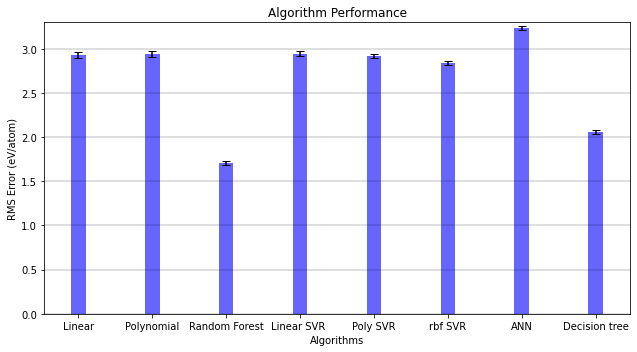

In [16]:
algos = ['Linear', 'Polynomial', 'Random Forest', 'Linear SVR ', 'Poly SVR', 'rbf SVR', 'ANN', 'Decision tree']
x_pos = np.arange(len(algos))
values = [2.93, 2.94, 1.709, 2.944, 2.915, 2.841, 3.233, 2.05824]
error = [0.02946, 0.03179, 0.02396, 0.02971, 0.02295, 0.02372, 0.02233, 0.026757099992338503]

fig, ax = plt.subplots(figsize=(9,5))
ax.yaxis.grid(True, color='k', linestyle='-', linewidth=0.25, which='both')
rectangles = ax.bar(x=x_pos, height=values, align='center', width=0.2, 
                    color='b', yerr=error, tick_label=algos, capsize=4, alpha=(0.6))
ax.set_ylim(0, 3.3)

ax.set_xlabel("Algorithms")
ax.set_ylabel("RMS Error (eV/atom)")
ax.set_title("Algorithm Performance")
plt.tight_layout()

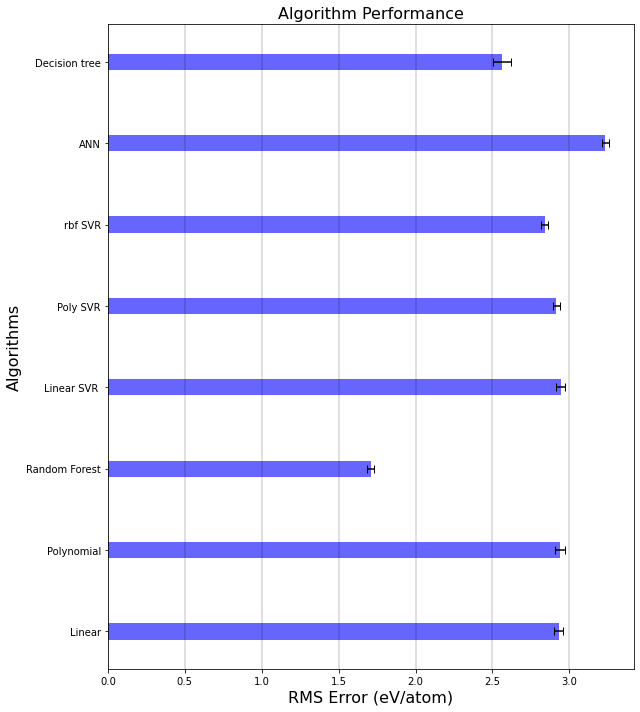

In [5]:
#sns.set_style('whitegrid')
algos = ['Linear', 'Polynomial', 'Random Forest', 'Linear SVR ', 'Poly SVR', 'rbf SVR', 'ANN', 'Decision tree']
x_pos = np.arange(len(algos))
values = [2.93, 2.94, 1.709, 2.944, 2.915, 2.841, 3.233, 2.05824]
error = [0.02946, 0.03179, 0.02396, 0.02971, 0.02295, 0.02372, 0.02233, 0.026757099992338503]

fig, ax = plt.subplots(figsize=(9, 10))
ax.xaxis.grid(True, color='k', linestyle='-', linewidth=0.25, which='both')
#rectangles = ax.barh(y=algos, height=0.1, align='center', width=0.2, 
#                    color='b', yerr=error, tick_label=algos, capsize=4, alpha=(0.6))

rectangles = ax.barh(algos, values, height=0.2, left=None, align='center', color='b', xerr=error, tick_label=algos, capsize=4, alpha=(0.6))
#ax.set_ylim(0, 3.3)

ax.set_xlabel("RMS Error (eV/atom)", fontsize=16)
ax.set_ylabel("Algorithms", fontsize=16)
ax.set_title("Algorithm Performance", fontsize=16)
#ax.xaxis.label.set_size(20)
plt.tight_layout()

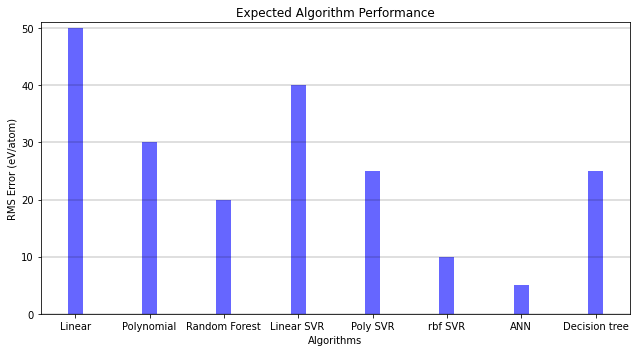

In [9]:
algos = ['Linear', 'Polynomial', 'Random Forest', 'Linear SVR ', 'Poly SVR', 'rbf SVR', 'ANN', 'Decision tree']
x_pos = np.arange(len(algos))
values = [50, 30, 20, 40, 25, 10, 5, 25]
#error = [0.02946, 0.03179, 0.02396, 0.02971, 0.02295, 0.02372, 0.02233, 0.026757099992338503]

fig, ax = plt.subplots(figsize=(9,5))
ax.yaxis.grid(True, color='k', linestyle='-', linewidth=0.25, which='both')
rectangles = ax.bar(x=x_pos, height=values, align='center', width=0.2, 
                    color='b', tick_label=algos, alpha=(0.6))
ax.set_ylim(0, 51)

ax.set_xlabel("Algorithms")
ax.set_ylabel("RMS Error (eV/atom)")
ax.set_title("Expected Algorithm Performance")
plt.tight_layout()

In [ ]:
X = dataframe.iloc[:, 1:-1].values
y = dataframe.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
regressor = RandomForestRegressor(n_estimators = 24, random_state = 0)
regressor.fit(X_train, y_train)
#y_pred = regressor.predict((X_test))
#return(round(np.sqrt(sk.metrics.mean_squared_error(y_test, y_pred, squared=False)), 3))
estimator = regressor.estimators_[5]

A decision tree algorithm is an algorithm not set out to be analysed, and is being described as it is briefly discussed in the Discussions section \ref{sec:discussion}. A decision Tree is a series of conditions which describe the dataset, and are found by the algorithm. Nodes ask queries of the data point, and sort it down branches of the tree, each branch has two outcomes (True/False or Large/Small for example) and each decision leads to another node. This loop of condition followed by a splitting of the data continues until an acceptable degree of accuracy is established. 

\begin{figure}
    \includegraphics[width=500]{Decision Tree Diagram.jpeg}
    \caption{Decision Tree Diagram}
    \label{Decision Tree Diagram}
\end{figure}

The diagram in Figure \ref{Decision Tree Diagram} shows how this may be laid out. The data is first split into those with the values in column 38 being larger and smaller than 6.5 Angstroms. These are further split with the less than 6.5 being split in column X[37] across the value 2.5, and greater than 6.5 in column 38 being split again in column 38 but this time across the value 7.5. This is repeated in 3 decisions (the 'depth' parameter of the decision tree) and the data is sorted into 8 groups.

\para The decision tree is implemented as follows. After splitting the data into 20$\%$ testing, the decision tree itself is established. The function \texttt{DecisionTreeRegressor(max_depth=3, random_state=0)} is used to find the tree in Figure \ref{Decision Tree Diagram}, and the \texttt{max_depth =24} is used to compare in the Results section \ref{sec:results}. The model is then fitted to the training dataset and \texttt{X-train, y_train} are passed to the \texttt{DecisionTreeRegressor.fit(X-train, y_train)} method.

In [5]:
from dtreeviz.trees import dtreeviz # remember to load the package
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

X = dataframe.iloc[:, :-1].values
y = dataframe.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


regr = DecisionTreeRegressor(max_depth=3)
clf = regr.fit(X_train, y_train)


print(round(np.sqrt(sk.metrics.mean_squared_error(y_test, clf.predict(X_test), squared=False)), 3))

2.674


In [6]:
acc = []
for i in range(0, 50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    regr = DecisionTreeRegressor(max_depth=24)
    clf = regr.fit(X_train, y_train)

    acc.append(round(np.sqrt(sk.metrics.mean_squared_error(y_test, clf.predict(X_test), squared=False)), 3))

acc = np.array(acc)
print(acc.max(), acc.min(), acc.mean(), acc.std())

2.148 2.003 2.0606799999999996 0.02636166914290522


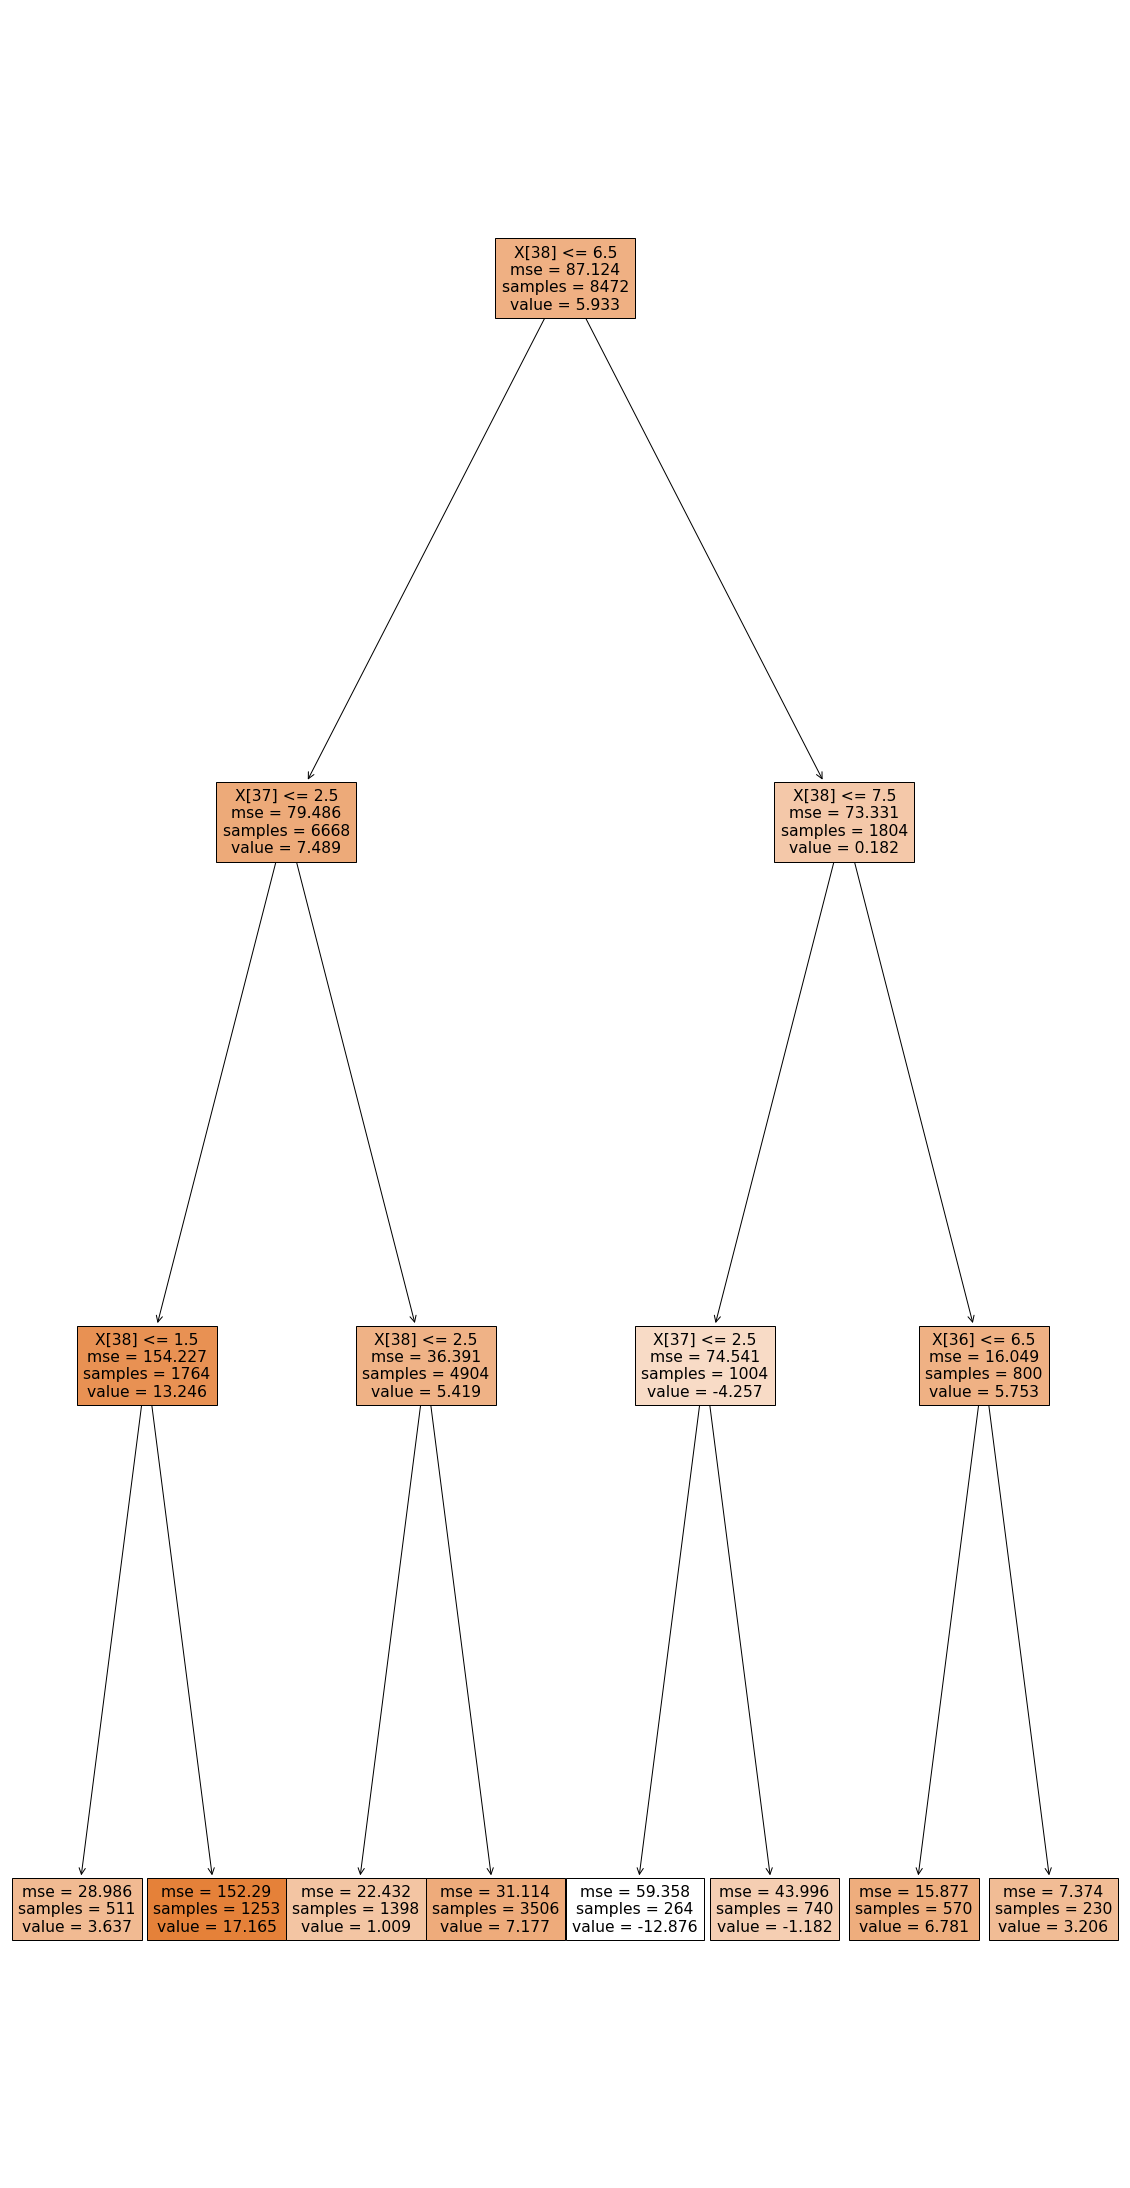

In [36]:
fig = plt.figure(figsize=(20,40))
_ = tree.plot_tree(regr, filled=True)

In [63]:
std = dataframe['Formation Energy'].std()
mean = dataframe['Formation Energy'].mean()
mean

5.960305964282295

No handles with labels found to put in legend.
C:\Users\Henry\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Histogram representing the Distibution of Formation Energy in the dataset.'}, xlabel='Formation Energy', ylabel='Density'>

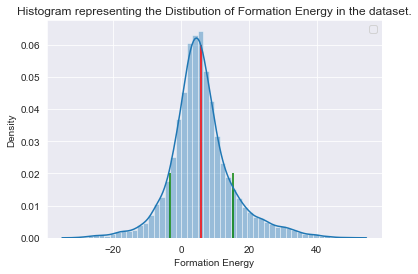

In [43]:
#sns.set_style('darkgrid')
plt.vlines(mean, 0, 0.06, color = 'r')
plt.vlines(mean+std, 0, 0.02, color = 'g')
plt.vlines(mean-std, 0, 0.02, color = 'g')
plt.xlabel('Formation Energy eV/atom')
plt.title('Histogram representing the Distibution of Formation Energy in the dataset.')
plt.legend()
sns.distplot(d)

Text(30, 400, 'Standard Deviation: 9.31')

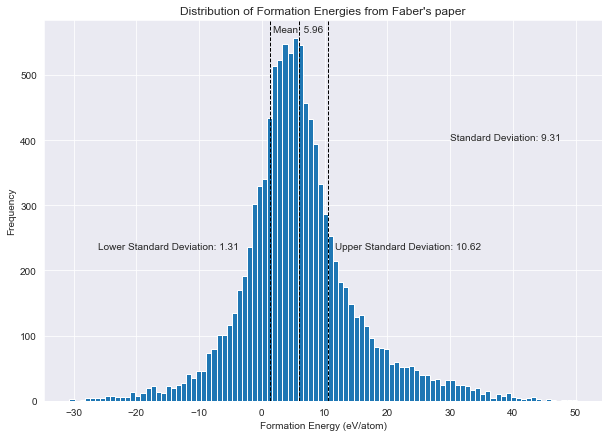

In [36]:
x = dataframe['Formation Energy']
sns.set_style('darkgrid')
fig = plt.figure(figsize =(10,7))
plt.title('Distribution of Formation Energies from Faber\'s paper')
plt.xlabel('Formation Energy (eV/atom)')
x.plot.hist(bins=100)

plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(x.mean()*0.3, max_ylim*0.97, 'Mean: {:.2f}'.format(x.mean()))

plt.axvline(x.mean() + 0.5*x.std(), color='k', linestyle='dashed', linewidth=1)
plt.text((x.mean() + 0.5*x.std())*1.1, max_ylim*0.4, 'Upper Standard Deviation: {:.2f}'.format(x.mean() + 0.5*x.std()))

plt.axvline(x.mean() - 0.5*x.std(), color='k', linestyle='dashed', linewidth=1)
plt.text((x.mean() - 0.5*x.std())*-20, max_ylim*0.4, 'Lower Standard Deviation: {:.2f}'.format(x.mean() - 0.5*x.std()))

plt.text(30, 400, 'Standard Deviation: {:.2f}'.format(x.std()))

In [61]:
dataframe['Formation Energy'].mean()

5.960305964282295